In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') # warnings are coming up while reading data hence ignoring the same for now
# data set given for reading
loans = pd.read_csv("loan.csv")

In [2]:
loans.ndim # dimensions to check

2

In [3]:
### Start eliminating null values column wise

In [4]:
loans.dropna(axis = 1, how = 'all', inplace = True)

In [5]:
loans.shape

(39717, 57)

### Now removing columns which are not driving loans' defaults , after checking data dictionary given
#### Observations
 - Identifier columns such as member id, emp id are not required for analysis 
 as we want to find the reasons for default over a data set and not for a specific person
 - Similarly desc and url columns have text data which is not required for investigation
 - Address columns showing zip code or addr state cannot tell us about defaulting

In [6]:
loans.drop(["desc","id", "member_id", "title", "emp_title", "url","zip_code", "addr_state"], axis = 1, inplace = True)

In [7]:
### Now checking for columns which are calculation related but not for defaulting vut for other purposes
# Columns whch are used for recoveries such as recoveries etc. or used for payment like next_pymnt_d are not required 
loans.drop(["delinq_2yrs", "revol_bal", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths"], axis = 1, inplace = True)

In [8]:
### Single Valued columns cannot be used for analysis
loans.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)

In [9]:
loans.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'last_credit_pull_d'],
      dtype='object')

In [10]:
### Dropping columns related to investors as we are interested in defaulting reasons only
loans.drop(['total_pymnt_inv','out_prncp_inv', 'funded_amnt_inv'], axis = 1, inplace = True)

In [11]:
### Checking if there are any columns which may have been missed for null values, so finding the percentage of null values in each column as below
print((loans.isnull().sum()/len(loans))*100)

loan_amnt                  0.000000
funded_amnt                0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_length                 2.706650
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
dti                        0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
mths_since_last_delinq    64.662487
mths_since_last_record    92.985372
open_acc                   0.000000
pub_rec                    0.000000
revol_util                 0.125891
total_acc                  0.000000
out_prncp                  0.000000
total_pymnt                0.000000
last_credit_pull_d         0.005036
dtype: float64


In [12]:
### Dropping mths_since_last_delinq and mths_since_last_record as over 2/3 rd values are missing
loans.drop(['mths_since_last_delinq','mths_since_last_record'], axis = 1, inplace = True)

In [13]:
print((loans.isnull().sum()/len(loans))*100)

loan_amnt              0.000000
funded_amnt            0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.706650
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.125891
total_acc              0.000000
out_prncp              0.000000
total_pymnt            0.000000
last_credit_pull_d     0.005036
dtype: float64


In [14]:
### Now checking emp_length values and how to fill the missing values (mean / median / mode)
print("Emp Length Mode is " + loans.emp_length.mode()[0])
loans.emp_length.fillna(loans.emp_length.mode()[0], inplace = True)
loans.emp_length.isnull().sum()

Emp Length Mode is 10+ years


0

In [15]:
### 'revol_util' has very low null values so deleting the rows which revol_util as null , size of data set will roughly remain the same
loans.dropna(axis = 0, subset = ['revol_util'] , inplace = True)


In [16]:
### same assumnption for last_credit_pull_d
loans.dropna(axis = 0, subset = ['last_credit_pull_d'] , inplace = True)

In [17]:
### Changing emp_length to numeric means replacing 10+ with 10 (as there is no value as 10 after 9) and <1 with 0
loans['emp_length'] = loans['emp_length'].astype(object)

In [20]:
loans['emp_length'] = loans['emp_length'].replace(['1 year'], '1')
loans['emp_length'] = loans['emp_length'].replace(['2 years'], '2')
loans['emp_length'] = loans['emp_length'].replace(['3 years'], '3')
loans['emp_length'] = loans['emp_length'].replace(['4 years'], '4')
loans['emp_length'] = loans['emp_length'].replace(['5 years'], '5')
loans['emp_length'] = loans['emp_length'].replace(['6 years'], '6')
loans['emp_length'] = loans['emp_length'].replace(['7 years'], '7')
loans['emp_length'] = loans['emp_length'].replace(['8 years'], '8')
loans['emp_length'] = loans['emp_length'].replace(['9 years'], '9')
loans['emp_length'] = loans['emp_length'].replace(['10+ years'], '10')
loans['emp_length'] = loans['emp_length'].replace(['< 1 year'], '0')

In [21]:
loans['emp_length'] = pd.to_numeric(loans['emp_length'])

In [22]:
loans['int_rate'] = pd.to_numeric(loans['int_rate'].apply(lambda x : x.split('%')[0]))

### As use case is to find reasons of default, loans which are current in status have to be ignored

In [23]:
loans = loans[loans.loan_status != "Current"]

### Finding Outliers for 2 columns which have been priortized for analysis - annual_inc and loan_amt

In [27]:
print(loans.annual_inc.quantile([0.25,0.5, 0.75,0.90, 0.95, 0.96, 0.97,0.98, 0.99]))
print(loans.loan_amnt.quantile([0.25, 0.5, 0.75,0.90, 0.96,0.95, 0.97,0.98, 0.99]))


0.25     40000.0
0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.96    150000.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64
0.25     5325.0
0.50     9600.0
0.75    15000.0
0.90    21600.0
0.96    25000.0
0.95    25000.0
0.97    28000.0
0.98    30000.0
0.99    35000.0
Name: loan_amnt, dtype: float64


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

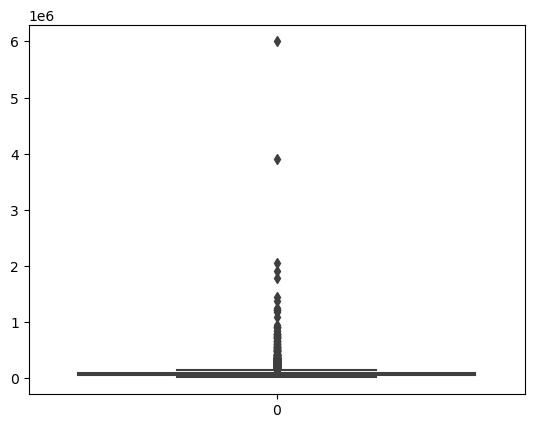

In [29]:
sns.boxplot(loans['annual_inc'])

<Axes: >

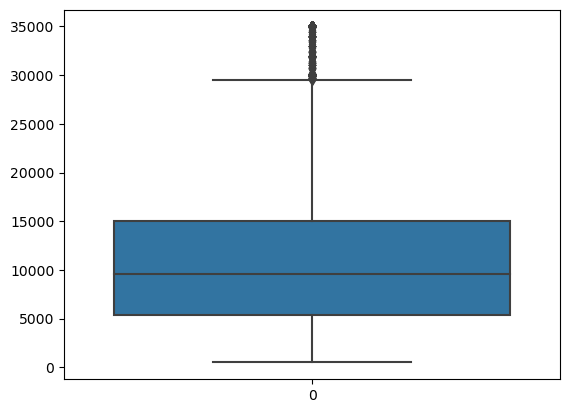

In [30]:
sns.boxplot(loans['loan_amnt'])

In [31]:
### Granular analysis for annual_inc as it has more outliers which cannot be ignored
print(loans.annual_inc.quantile([0.25,0.5, 0.75,0.90, 0.91,0.92,0.93,0.94, 0.95, 0.96, 0.97,0.98, 0.99]))

0.25     40000.0
0.50     59000.0
0.75     82000.0
0.90    115000.0
0.91    120000.0
0.92    122000.0
0.93    127500.0
0.94    134224.0
0.95    140004.0
0.96    150000.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64


In [36]:
### removing everything after 95 percentile as there is large variation above 95 percentile
loans = loans[loans.annual_inc <= loans['annual_inc'].quantile(0.95)]

<Axes: >

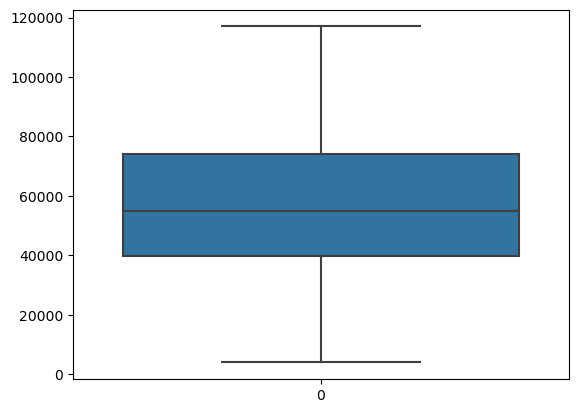

In [38]:
sns.boxplot(loans['annual_inc']) # outliers removed

### Univariate Analysis

In [39]:
## Home Ownership
loans['home_ownership'].value_counts()

home_ownership
RENT        17543
MORTGAGE    14402
OWN          2748
OTHER          88
Name: count, dtype: int64

In [40]:
loans = loans[loans.home_ownership != "NONE"] ### removing none values

<Axes: xlabel='home_ownership', ylabel='count'>

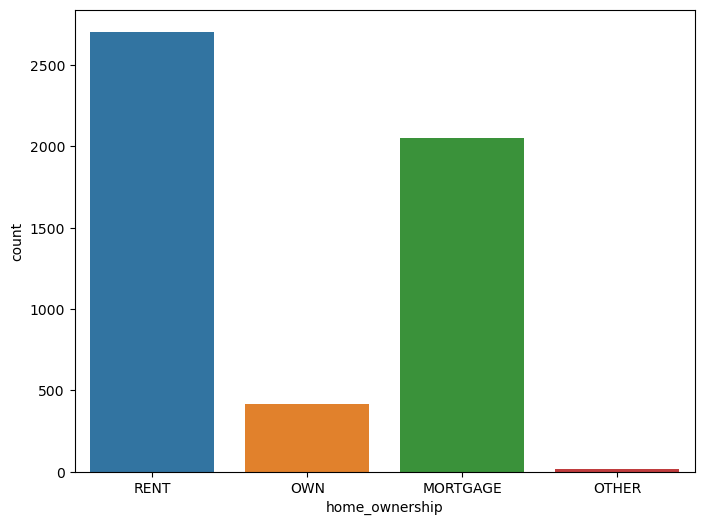

In [43]:
# Focussing on charged off loans data set to see if any specific reasons for defaulting
loans_chgd_off = loans[loans['loan_status']=='Charged Off']
f, a = plt.subplots(figsize = (8,6))
sns.countplot(x='home_ownership', data=loans_chgd_off)

<Axes: xlabel='count', ylabel='purpose'>

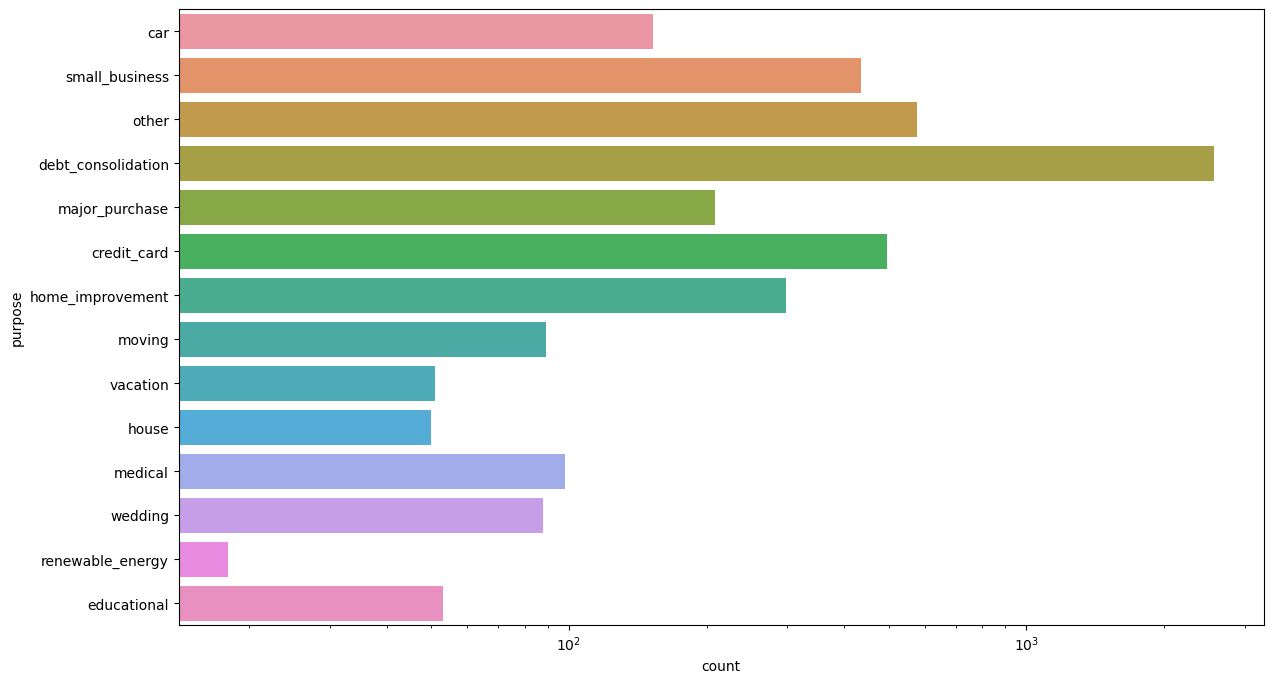

In [45]:
## Purpose of the loan
f, a = plt.subplots(figsize = (14,8))
a.set(xscale = 'log')
sns.countplot(y ='purpose', data=loans_chgd_off)

In [83]:
# bins for int_rate, annual_inc
loans['annual_inc_grp'] = pd.cut(loans['annual_inc'], 
                                 bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [84]:
loans['int_rate_grp'] = pd.cut(loans['int_rate'], 
                               bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])

In [85]:
loans.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_util,total_acc,out_prncp,total_pymnt,last_credit_pull_d,loan_amnt_groups,annual_inc_grp,int_rate_grp
0,5000,5000,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,3,0,83.70%,9,0.0,5863.155187,May-16,0-10k,3k-31k,9%-13%
1,2500,2500,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,3,0,9.40%,4,0.0,1008.710000,Sep-13,0-10k,31k-58k,13%-17%
2,2400,2400,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,2,0,98.50%,10,0.0,3005.666844,May-16,0-10k,3k-31k,13%-17%
3,10000,10000,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,10,0,21%,37,0.0,12231.890000,Apr-16,10k-20k,31k-58k,13%-17%
5,5000,5000,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,9,0,28.30%,12,0.0,5632.210000,Jan-16,0-10k,31k-58k,5%-9%


<Axes: xlabel='annual_inc_grp', ylabel='count'>

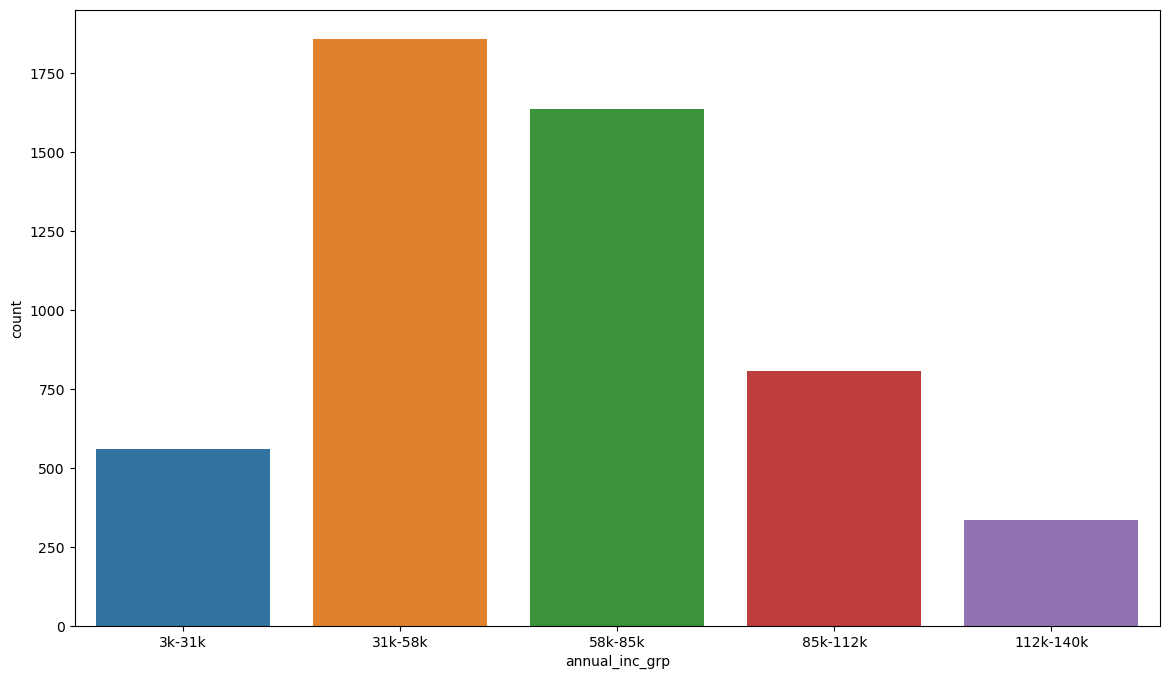

In [89]:
# Observe how annual income bin looks against loans charged off 
loans_chgd_off = loans[loans['loan_status']=='Charged Off']
f, a = plt.subplots(figsize = (14,8))
sns.countplot(x = "annual_inc_grp", data = loans_chgd_off)

<Axes: xlabel='int_rate_grp', ylabel='count'>

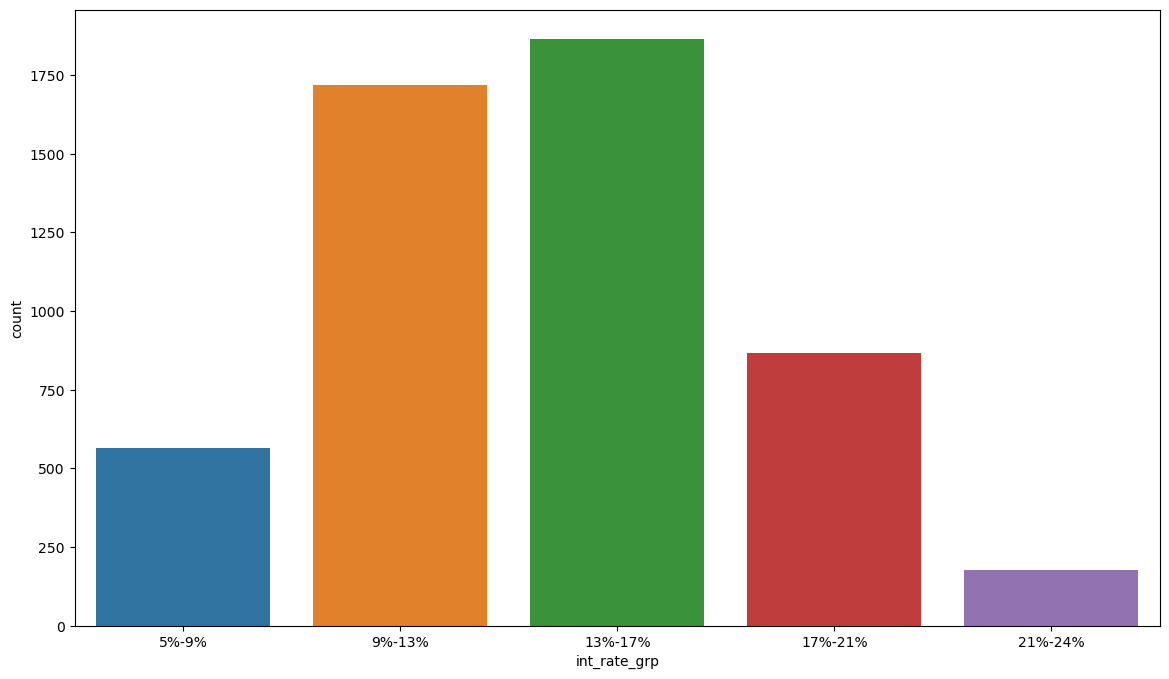

In [90]:
# Observe interest rate bin looks against loans charged off data set
f, a = plt.subplots(figsize = (14,8))
sns.countplot(x='int_rate_grp', data=loans_chgd_off)

<Axes: xlabel='emp_length', ylabel='count'>

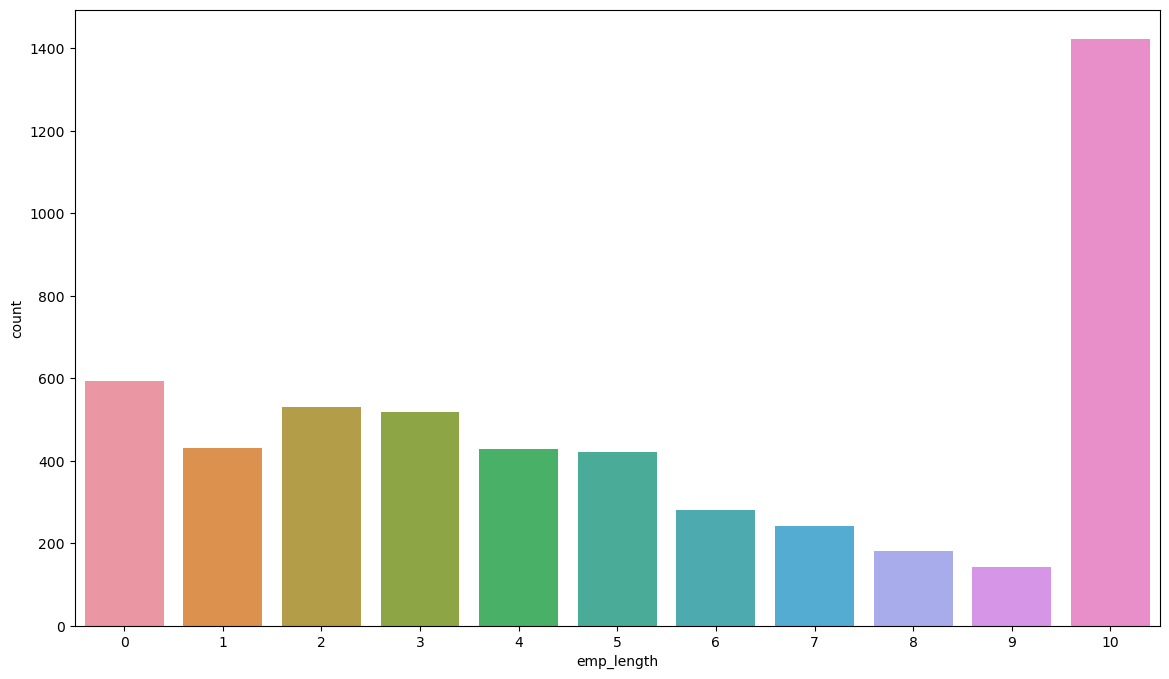

In [54]:
# Observe employment tenure looks against loans charged off data set
f, a = plt.subplots(figsize = (14,8))
sns.countplot(x='emp_length', data=loans_chgd_off)

### Observations using charged off loans data set:
- People living on rent have higher default rates
- People using loans to reduce other obligations belong to the highest category from Purpose perspective
- People with employment length of 10 years have higher defaulting rates
- People getting loans at 13-17 % default more
- People having annual income between 31000 USD and 85000 USD default more

### Bivariate Analysis

#### Annual Income

<Axes: xlabel='annual_inc_grp', ylabel='loan_amnt'>

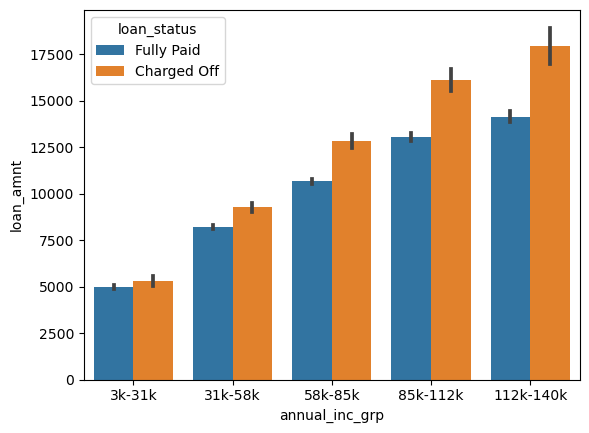

In [87]:
# Annual Income vs Loan Amt on Loans data set (Paid or Charged Off)
sns.barplot(x = "annual_inc_grp", y = "loan_amnt", hue = 'loan_status', data = loans)

<Axes: xlabel='home_ownership', ylabel='annual_inc'>

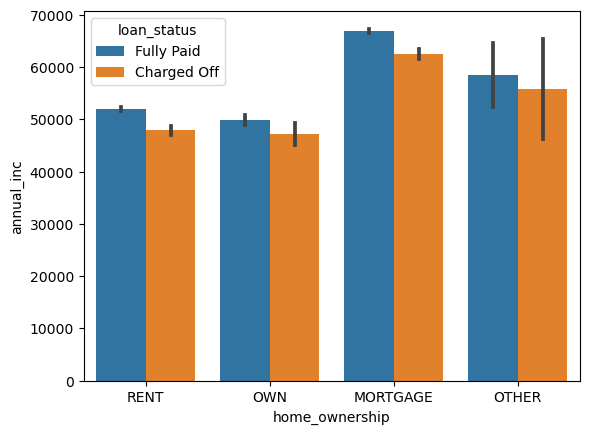

In [66]:
# Annual Income vs Home Ownership on Loans data set (Paid or Charged Off)
sns.barplot(x = "home_ownership", y = "annual_inc", hue = 'loan_status', data = loans)

### Loan Amount Analysis


<Axes: xlabel='home_ownership', ylabel='loan_amnt'>

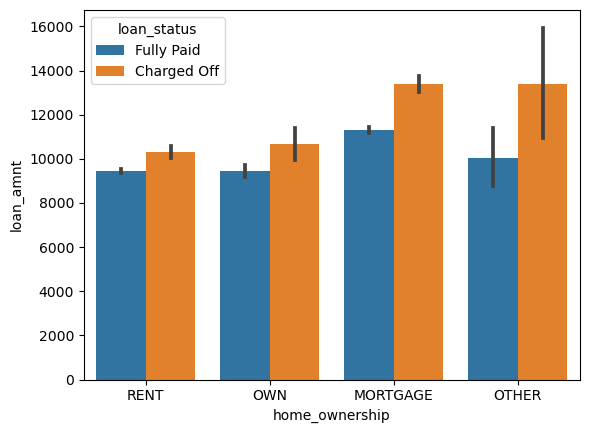

In [67]:
# Loan Amount vs howm ownership 
sns.barplot(data =loans,x='home_ownership', y='loan_amnt', hue ='loan_status')


<Axes: xlabel='loan_amnt', ylabel='purpose'>

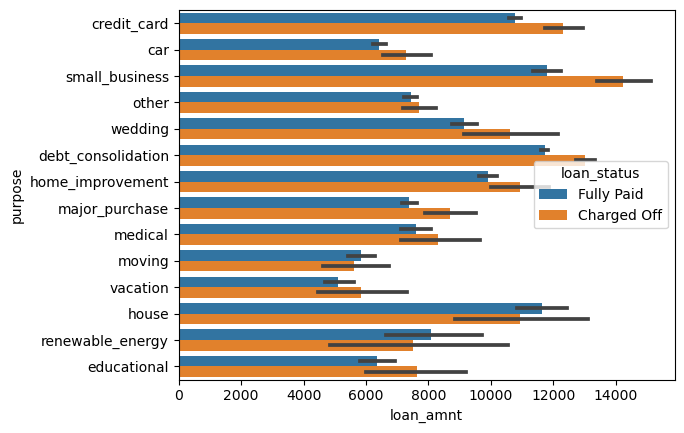

In [68]:
# Loan Amt vs purpose for which loan was taken
sns.barplot(data =loans,x='loan_amnt', y='purpose', hue ='loan_status')

<Axes: xlabel='loan_amnt_groups', ylabel='int_rate'>

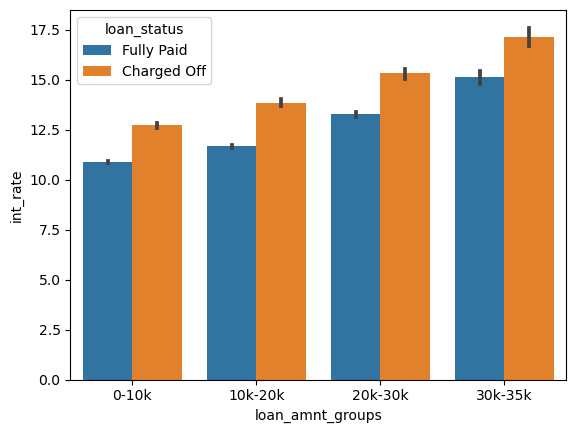

In [69]:
loans['loan_amnt_groups'] = pd.cut(loans['loan_amnt'], bins=4,precision =0,labels=['0-10k','10k-20k','20k-30k','30k-35k'])
sns.barplot(data =loans,x='loan_amnt_groups', y='int_rate', hue ='loan_status')

### Observations for multivariate analysis
- People defaulting more when having annual income as 60000 - 70000 USD and home is mortgaged
- People who default have higher loan amounts as compared to others in the same income group
- People who are owning home as "MORTGAGE' and have a loan amount of over 14000 USD default more
- People default more when taking a loan for small business and amount is over 14000 USD
- People default more when having an interest rate of 15 - 17.5 % and loan amount of 30000 - 35000 USD